# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Muhammad Hanif Rais]
- **Email:** [hanifrais07@gmail.com]
- **ID Dicoding:** [Muhammad Hanif Rais]

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan tahun 2018 dibandingkan tahun 2017
- bagaimana RFM analisis pada data ini?
- Bagaaimana demografi customer berdasarkan negara bagian dan kota

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv(r'D:\Data Analyst\Dataset\E-Commerce Public Dataset\customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
orders_df = pd.read_csv(r'D:\Data Analyst\Dataset\E-Commerce Public Dataset\orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
payments_df = pd.read_csv(r'D:\Data Analyst\Dataset\E-Commerce Public Dataset\order_payments_dataset.csv')
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Assessing & Cleaning Data

### Assessing & Cleaning tabel customers_df

In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [97]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [20]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [22]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Assessing & Cleaning tabel orders_df

In [25]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [99]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp           634
order_estimated_delivery_date      459
dtype: int64

In [36]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [29]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Assessing & Cleaning tabel payments_df

In [101]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [34]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [19]:
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

## Cleaning Data

### Membersihkan tabel customers_df

In [6]:
customers_df.duplicated().sum()

0

In [7]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [9]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### Membersihkan tabel orders_df

In [14]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [29]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [31]:
orders_df.duplicated().sum()

0

In [64]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [19]:
orders_df.dropna(axis=1, inplace=True)

In [21]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
dtype: int64

In [23]:
orders_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_estimated_delivery_date'],
      dtype='object')

In [25]:
orders_df.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_estimated_delivery_date    object
dtype: object

In [27]:
# Mengubah tipe data menjadi datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [29]:
orders_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [31]:
# Memformat ulang tanggal menjadi tahun-bulan-hari
orders_df['order_purchase_timestamp'] = orders_df['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')
orders_df['order_estimated_delivery_date'] = orders_df['order_estimated_delivery_date'].dt.strftime('%Y-%m-%d')

In [113]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-26


### Membersihkan tabel payment_df

In [115]:
payments_df.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [84]:
payments_df.duplicated().sum()

0

In [49]:
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [148]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [117]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Exploratory Data Analysis (EDA)

### Explore customers_df

In [119]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [33]:
unique_customer_id = customers_df['customer_id'].unique()

In [35]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [37]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore orders_df

In [39]:
payments_df['payment_value'].max()

13664.08

In [41]:
orders_df.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_estimated_delivery_date    object
dtype: object

In [43]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
66035,6235837e6ca53e3b4b48b50a91fc04f5,4bf42d9c53f4b35a0443a8fecb6c707d,delivered,2017-11-10,2017-11-27
16060,0029f17cf0e7640c5cb6825af681303f,687223424c00a708c168301ebb8d16ef,delivered,2018-05-02,2018-05-22
3733,5875e5804ca85e3b4c8dda7a7dfce4cc,954cfe56edc8052d49bc5b4715efbdf3,delivered,2018-06-14,2018-07-18
42508,1f3f3b71c956fb0d0bc10544681884e5,740b964429e75570fa44130c78310f81,delivered,2017-02-16,2017-03-15
12656,7efedf2c0bfaa6cae462a2d447584503,a857959cc4db4edd934295addd68971c,delivered,2018-01-02,2018-02-02


In [45]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])


In [47]:
delivery_time = orders_df["order_estimated_delivery_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [49]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,delivery_time
70861,39cfa7b8a9a7828476d1074dbd1838a5,5f34948f5d071e36441bb09513db16b1,delivered,2017-11-24,2017-12-14,20.0
14817,c468889241b5b0b1e079f4ef8ff2b86a,7a4fbe21b63f57e0e6f3df6cf0d63f84,delivered,2017-12-26,2018-01-26,31.0
58748,e005be792ff63719b707213974186c8d,851847baa2edb97deb7a8f7fc0c7df21,invoiced,2018-05-10,2018-05-29,19.0
69691,a85e1b0e72e3d941ebc9cbdeb31b728a,e6aa70ff0bfc37d68295ff0778e5559b,delivered,2017-03-18,2017-04-17,30.0
10589,6f9ad3f2dd5e9af9e2469639e421f66a,4fbd85d024063c1f0ad130a3ddd6e01a,delivered,2017-12-19,2018-01-17,29.0


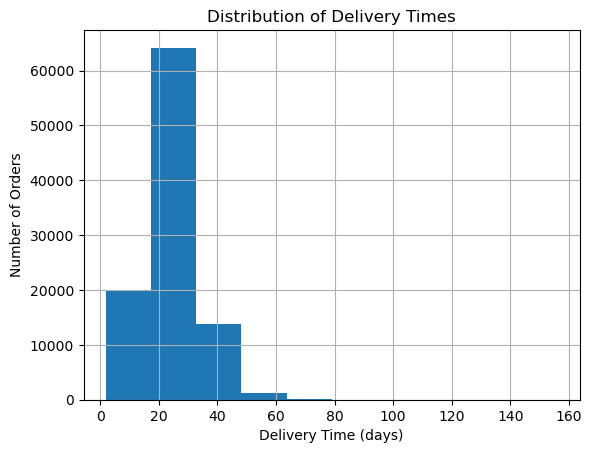

In [51]:
orders_df.delivery_time.hist()

plt.xlabel("Delivery Time (days)")
plt.ylabel("Number of Orders")

plt.title("Distribution of Delivery Times")
plt.show()

### Explore payments_dataset

In [53]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [55]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [57]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [87]:
payments_df['payment_value'].head(5)

0     99.33
1     24.39
2     65.71
3    107.78
4    128.45
Name: payment_value, dtype: float64

In [93]:
payments_df['payment_value'].tail(5)

103881    363.31
103882     96.80
103883     47.77
103884    369.54
103885    191.58
Name: payment_value, dtype: float64

In [67]:
len(orders_df.columns)

8

### Explore all data

### Menghubungkan semua data

In [59]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-13,20.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-09-04,27.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-15,27.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-26,13.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [61]:
orders_payments_df = pd.merge(
    left=orders_df,
    right=payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_payments_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-13,20.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-09-04,27.0,1.0,credit_card,3.0,179.12


In [63]:
all_df = pd.merge(
    left=orders_customers_df,
    right=orders_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_estimated_delivery_date_x,delivery_time_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_id_y,order_status_y,order_purchase_timestamp_y,order_estimated_delivery_date_y,delivery_time_y,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-13,20.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-13,20.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-09-04,27.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-09-04,27.0,1.0,credit_card,3.0,179.12


In [151]:
# Menyimpan DataFrame yang di-merge ke file CSV
all_df.to_csv('all_data.csv', index=False)

# Untuk mendownload file CSV di Jupyter Notebook
from IPython.display import FileLink

# Menyediakan link untuk mengunduh file CSV
FileLink(r'all_data.csv')

C:\Users\IP330\all_data.csv

## Visualization & Explanatory Analysis

### bagaimana performa penjualan tahun 2018 dibandingkan tahun 2017

In [153]:
all_df.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_estimated_delivery_date_x,delivery_time_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_id_y,order_status_y,order_purchase_timestamp_y,order_estimated_delivery_date_y,delivery_time_y,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-13,20.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-13,20.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-09-04,27.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-09-04,27.0,1.0,credit_card,3.0,179.12


In [154]:
df_2017 = all_df[all_df['order_purchase_timestamp_y'].dt.year == 2017]
df_2018 = all_df[all_df['order_purchase_timestamp_y'].dt.year == 2018]

In [157]:
monthly_counts_2017 = df_2017.groupby(df_2017['order_purchase_timestamp_y'].dt.month).size()
monthly_counts_2018 = df_2018.groupby(df_2018['order_purchase_timestamp_y'].dt.month).size()

In [159]:
combined_df = pd.DataFrame({'2017': monthly_counts_2017, '2018': monthly_counts_2018})

In [ ]:
rfm_df.to_csv('rfm_data.csv', index=False)  # Menyimpan ke CSV

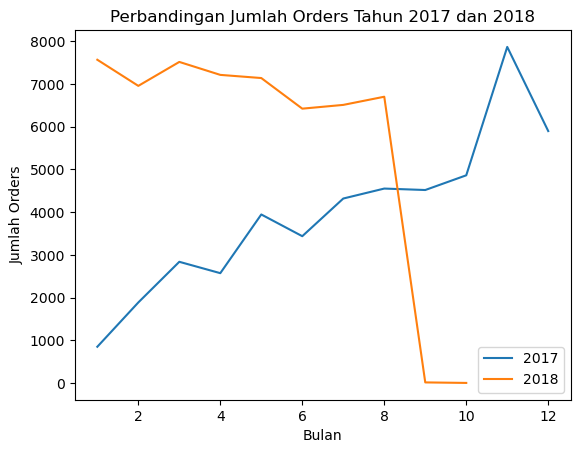

In [314]:
combined_df.plot(kind='line')
plt.title('Perbandingan Jumlah Orders Tahun 2017 dan 2018')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Orders')
plt.legend()
plt.show()

### Bagaimana demografi pelanggan yang kita miliki 

In [65]:
all_df.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_estimated_delivery_date_x,delivery_time_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_id_y,order_status_y,order_purchase_timestamp_y,order_estimated_delivery_date_y,delivery_time_y,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-13,20.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-13,20.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-09-04,27.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-09-04,27.0,1.0,credit_card,3.0,179.12


### Berdasarkan Kota Customer tinggal

In [67]:
customer_by_city = all_df.groupby('customer_city')['customer_id_x'].count()

print(customer_by_city)

customer_city
abadia dos dourados     3
abadiania               1
abaete                 12
abaetetuba             12
abaiara                 2
                       ..
xinguara                9
xique-xique             3
zacarias                2
ze doca                 5
zortea                  2
Name: customer_id_x, Length: 4119, dtype: int64


### Berdasarkan Negara Bagian

In [75]:
bystate_df = all_df.groupby(by="customer_state").customer_id_x.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id_x": "customer_count"
}, inplace=True)
bystate_df

,customer_state,customer_count
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380
5,CE,1336
6,DF,2140
7,ES,2033
8,GO,2020
9,MA,747


C:\Users\IP330\AppData\Local\Temp\ipykernel_12944\1302712626.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state',


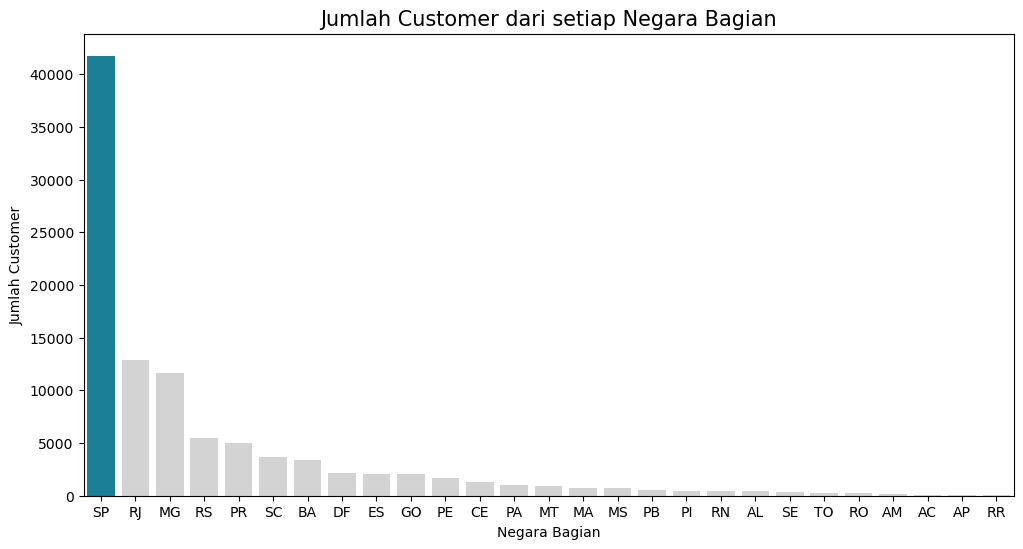

In [90]:
plt.figure(figsize=(12, 6))

most_common_state = bystate_df.loc[bystate_df['customer_count'].idxmax(), 'customer_state']

bystate_df = bystate_df.sort_values(by='customer_count', ascending=False)

sns.barplot(x='customer_state',
            y='customer_count',
            data=bystate_df,
            palette=["#068DA9" if state == most_common_state else "#D3D3D3" for state in bystate_df['customer_state']]
            )

plt.title("Jumlah Customer dari setiap Negara Bagian", fontsize=15)
plt.xlabel("Negara Bagian")
plt.ylabel("Jumlah Customer")
plt.xticks(fontsize=10)
plt.show()

Pada grafik diatas berdasarkan State, SP memiliki data customer terbanyak.

C:\Users\IP330\AppData\Local\Temp\ipykernel_12944\1085204875.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bycity_df.index,


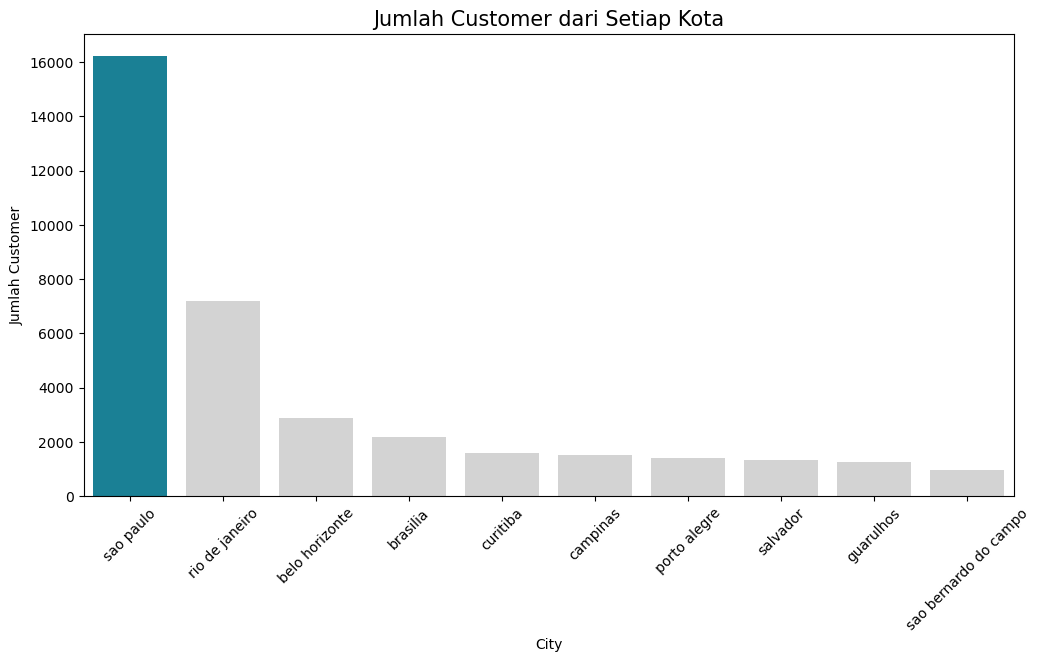

In [91]:

bycity_df = all_df['customer_city'].value_counts().head(10)

plt.figure(figsize=(12, 6))

most_common_city = bycity_df.idxmax()

bycity_df = bycity_df.sort_values(ascending=False)

sns.barplot(x=bycity_df.index,
            y=bycity_df.values,
            palette=["#068DA9" if city == most_common_city else "#D3D3D3" for city in bycity_df.index]
            )

plt.title("Jumlah Customer dari Setiap Kota", fontsize=15)
plt.xlabel("City")
plt.ylabel("Jumlah Customer")
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [71]:
all_df.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_estimated_delivery_date_x,delivery_time_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_id_y,order_status_y,order_purchase_timestamp_y,order_estimated_delivery_date_y,delivery_time_y,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-13,20.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-13,20.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-09-04,27.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-09-04,27.0,1.0,credit_card,3.0,179.12


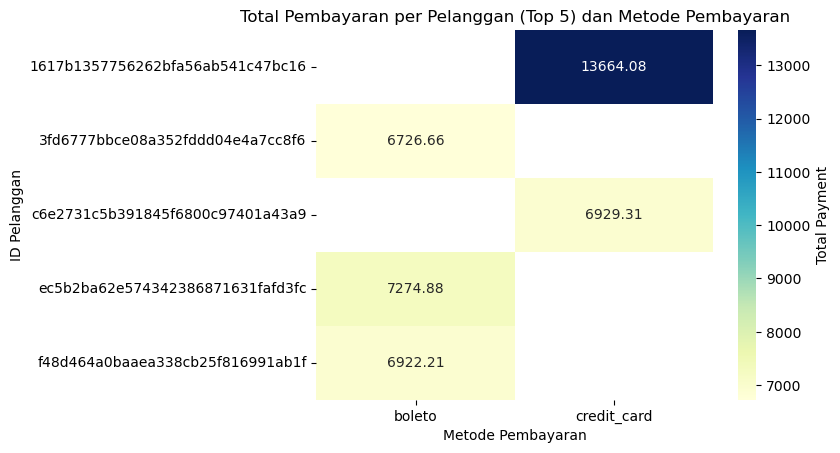

In [96]:
# Menghitung total pembayaran per pelanggan dan metode pembayaran
payment_counts = all_df.groupby(["customer_id_x", "payment_type"])["payment_value"].sum().reset_index()

# Menghitung total pembayaran per pelanggan
total_payment_per_customer = payment_counts.groupby("customer_id_x")["payment_value"].sum()

# Mendapatkan 5 pelanggan dengan total pembayaran tertinggi
top_5_customers = total_payment_per_customer.nlargest(5).index

# Memfilter data untuk top 5 pelanggan
top_5_data = payment_counts[payment_counts["customer_id_x"].isin(top_5_customers)]

# Membuat pivot tabel untuk top 5 pelanggan
payment_pivot = top_5_data.pivot(index='customer_id_x', columns='payment_type', values='payment_value')

# Membuat heatmap untuk top 5 pelanggan
sns.heatmap(payment_pivot, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Total Payment'})
plt.title("Total Pembayaran per Pelanggan (Top 5) dan Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("ID Pelanggan")
plt.show()


## RFM Analysis

In [161]:
all_df.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_estimated_delivery_date_x,delivery_time_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_id_y,order_status_y,order_purchase_timestamp_y,order_estimated_delivery_date_y,delivery_time_y,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-13,20.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-13,20.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-09-04,27.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-09-04,27.0,1.0,credit_card,3.0,179.12


In [163]:
rfm_df = all_df.groupby(by="customer_id_x", as_index=False).agg({
    "order_purchase_timestamp_x": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "payment_value": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()
     


,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,107.01


In [165]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,114.74,337
1,000161a058600d5901f007fab4c27140,2017-07-16,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,107.01,198


In [167]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
1,000161a058600d5901f007fab4c27140,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,1,107.01,198


In [169]:
rfm_df.describe()

,frequency,monetary,recency
count,99441.0,99441.000000,99441.000000
mean,1.0,160.988648,290.272956
std,0.0,221.950728,153.670615
min,1.0,0.000000,0.000000
25%,1.0,62.010000,166.000000
50%,1.0,105.290000,272.000000
75%,1.0,176.970000,400.000000
max,1.0,13664.080000,773.000000


In [171]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
63970,a4b417188addbc05b26b72d5e44837a1,1,89.71,0
51713,856336203359aa6a61bf3826f7d84c49,1,222.03,1
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,1,197.55,14
74611,bf6181a85bbb4115736c0a8db1a53be3,1,80.38,16
15595,2823ffda607a2316375088e0d00005ec,1,137.03,18


In [173]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
66279,aa62a16b10e3fb24ecdefd7e4dc3fa65,1,206.56,115
66301,aa738cdb72af39e38482fa25b992c67c,1,76.86,222
66300,aa7210736aad65a84e964cfa8d64aa66,1,141.90,202
66299,aa72002446dfbac0691304465c1b982d,1,20.95,612


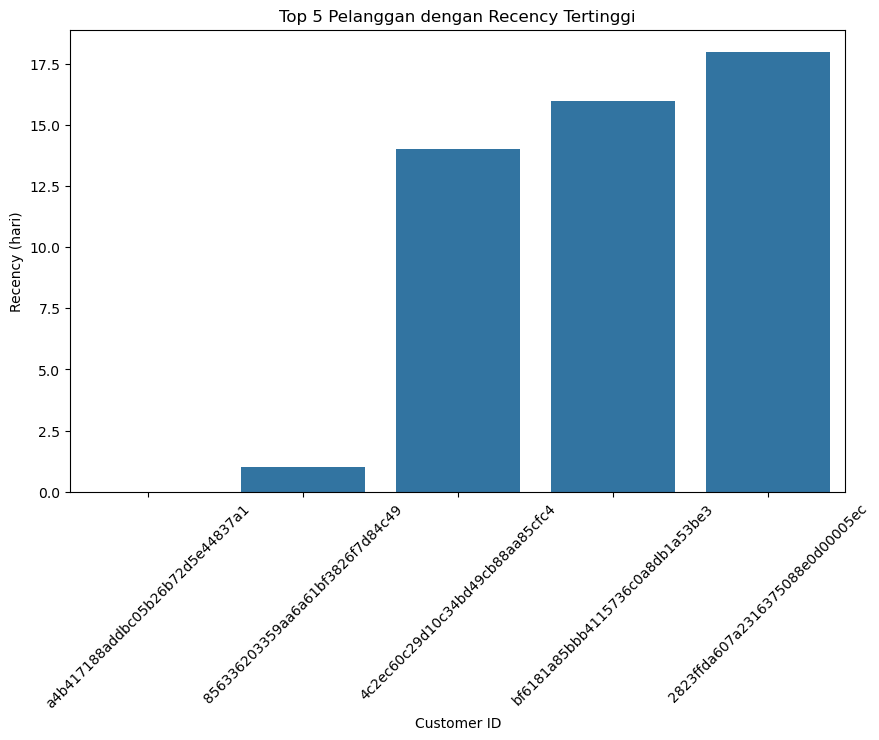

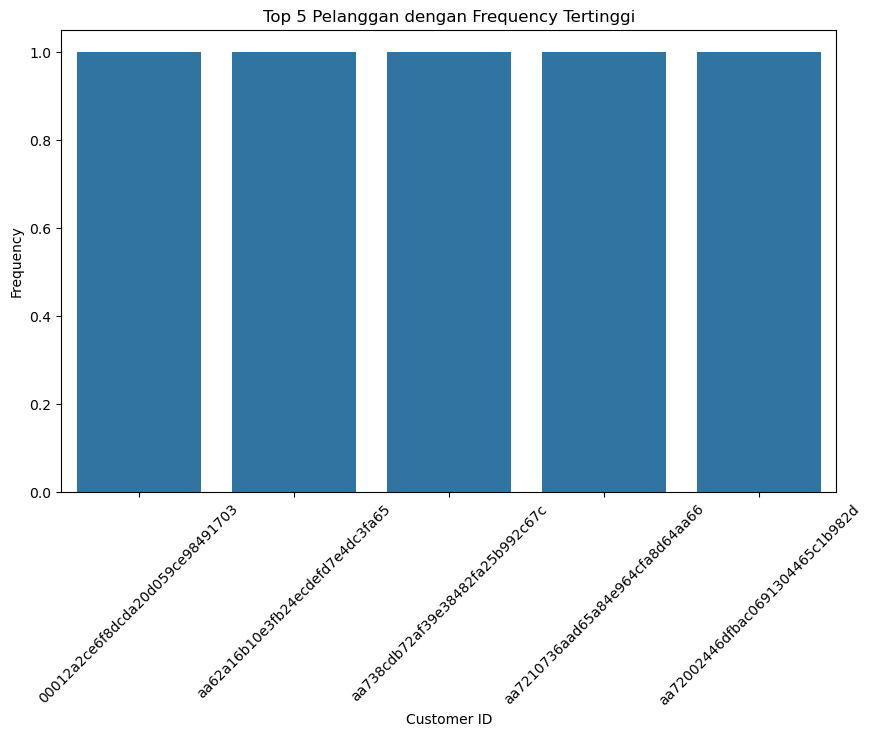

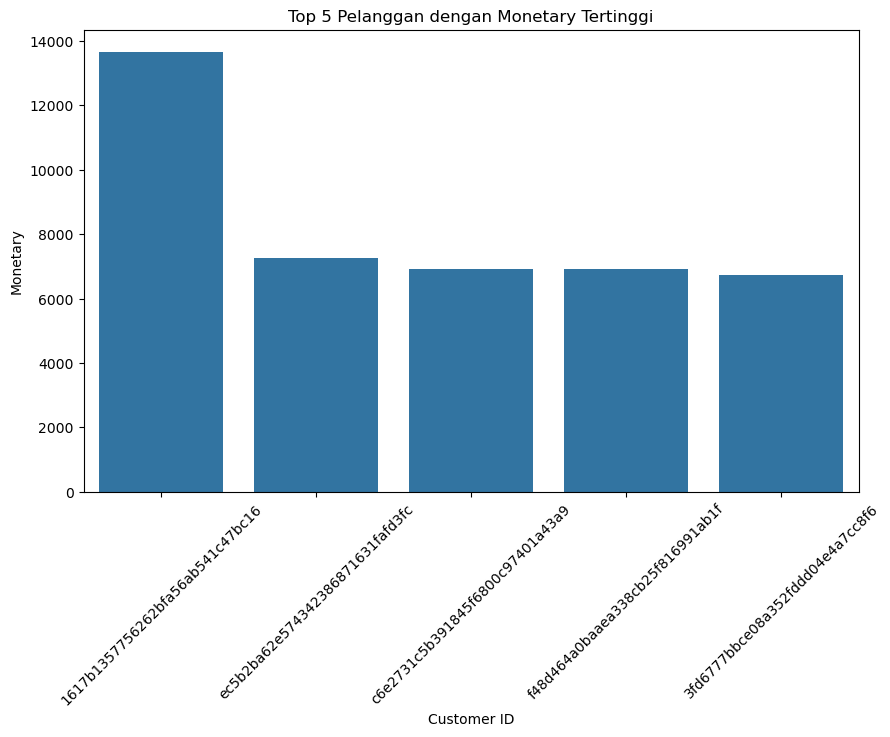

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan rfm_df adalah DataFrame Anda

# Visualisasi Recency
plt.figure(figsize=(10, 6))
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5))
plt.title("Top 5 Pelanggan dengan Recency Tertinggi")
plt.xlabel("Customer ID")
plt.ylabel("Recency (hari)")
plt.xticks(rotation=45)
plt.show()

# Visualisasi Frequency
plt.figure(figsize=(10, 6))
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5))
plt.title("Top 5 Pelanggan dengan Frequency Tertinggi")
plt.xlabel("Customer ID")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Visualisasi Monetary
plt.figure(figsize=(10, 6))
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5))
plt.title("Top 5 Pelanggan dengan Monetary Tertinggi")
plt.xlabel("Customer ID")
plt.ylabel("Monetary")
plt.xticks(rotation=45)
plt.show()

## Conclusion

### Perbandingan Jumlah Orders 2017-2018:
Jumlah orders pada tahun 2018 menunjukkan performa yang lebih tinggi dibandingkan tahun 2017 dari awal hingga kuarter 3. Namun, penurunan signifikan di kuarter 4 tahun 2018 menjadi perhatian, terutama karena tahun 2017 menunjukkan pola pertumbuhan yang konsisten sepanjang tahun. Ini menandakan bahwa perlu ada strategi pemasaran yang lebih agresif dan efektif menjelang akhir tahun untuk menjaga pertumbuhan jumlah orders pada kuarter 4.

Saran:

Perkuat kampanye promosi menjelang kuarter 4, seperti penawaran diskon akhir tahun, program loyalitas, atau kolaborasi dengan mitra strategis.
Tingkatkan eksposur melalui media sosial dan iklan digital dengan fokus pada momentum belanja liburan.
Lakukan evaluasi terhadap kendala yang menyebabkan penurunan di akhir tahun 2018, misalnya stok, pengiriman, atau persaingan pasar.

### Top 5 RFM Analysis:
Top 5 hasil dari analisis RFM menunjukkan kelompok pelanggan dengan nilai tertinggi berdasarkan recency, frequency, dan monetary. Dampaknya dapat digunakan untuk memahami karakteristik pelanggan paling berharga.

Saran:

Fokuskan strategi retensi pada pelanggan top-tier ini, seperti program eksklusif atau personalisasi penawaran.
Gunakan data ini untuk menciptakan strategi upselling dan cross-selling yang tepat sasaran.
Identifikasi pola pembelian dan perilaku pelanggan untuk memperluas basis pelanggan serupa.

In [94]:
import pickle

# Simpan seluruh progres ke file
with open('notebook_progress.pkl', 'wb') as f:
    pickle.dump({
        'df': df,
        'model': model
    }, f)

# Memuat progres dari file
with open('notebook_progress.pkl', 'rb') as f:
    progress = pickle.load(f)
    df = progress['df']
    model = progress['model']
    


NameError: name 'df' is not defined